# Package Required

In [2]:
from imageio import imread
from cv2 import resize
from matplotlib import pyplot as plt
from scipy.ndimage.morphology import binary_dilation, binary_erosion
from numpy import array
import numpy as np
import math
from PIL import Image, ImageDraw

# Read Image and Preprocessing

(276, 363)


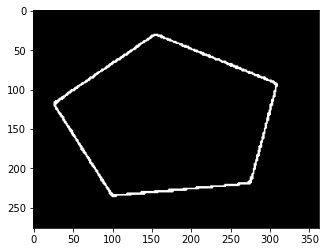

In [3]:
img = imread('binary.png')
gray= np.uint8(0.212670 * img[:,:,0] + 0.715160 * img[:,:,1] + 0.072169 * img[:,:,2])
gray[gray > 127] = 255
gray[gray < 128] = 0
binarized = gray

# dilation and erosion are applied multiple times to join the two parallel lines and also remove the jagging
binarized = binary_erosion(binary_erosion(binary_erosion(binary_dilation(binary_dilation(binarized)))))
print(binarized.shape)
plt.imshow(binarized, cmap='gray')
plt.show()

# Hough Transform (Week09 Lab Exercise Submission)

In [32]:
binarized[0][0]

False

HoughTransform_Matrix.shape= (62, 913)


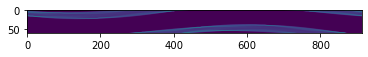

In [67]:
# Submission info - reply them with your name & unikey
studentname = 'Roshan Venkatesan'
unikey = 'rven8281'

# TODO: Complete Hough Transform below (please refer to lab notes for steps)
# some variable you may want to use: [binarized]
# please name your Hough transfrom matrix as [H], then you use the following codes
sampfreq = 0.1

width = (2*np.pi / sampfreq)
height = (913)

H = np.zeros((int(width),int(height)))
theta = np.arange(0,2*np.pi,sampfreq)
upperbound = np.power(np.power(width,2) + np.power(height,2), 0.5)

for x in range(binarized.shape[0]):
    for y in range(binarized.shape[1]):
        if binarized[x,y] == True:
            for t in range (height):
                theta = t*2*np.pi/height
                rho = x*np.cos(theta) + y*np.sin(theta)
                normalizedx = (width*rho)/upperbound
                H[int(normalizedx),t] = H[int(normalizedx),t] + 1
        

        
        
print('HoughTransform_Matrix.shape=', H.shape)        
plt.imshow(H)
plt.show()

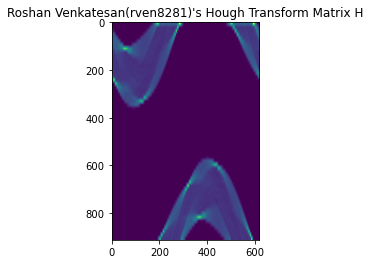

In [68]:
def scale_H_for_visualization(H):
    # H is too thin to be visualized, so this function can rescale it for a better visualization
    return resize(H, (H.shape[0]*10, H.shape[1]))
plt.title("%s(%s)'s Hough Transform Matrix H"%(studentname, unikey))
plt.imshow(scale_H_for_visualization(H))
plt.show()
# Remember to save your output for your LCP submission.

# Next Step: Line Detection

In [ ]:
# Complete your code here

# Extension: Inverse Hough Transform

In [ ]:
# Complete your code here